<a href="https://colab.research.google.com/github/baselshunnarah/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project Title: Prediction of Product Sales
Author: Basel Shunnarah

## Project Overview

## Load and Inspect Data

In [295]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [296]:
# import panda
import pandas as pd

file_path="/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

In [297]:
#read_the file

df_prediction=pd.read_csv(file_path)
df_prediction.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [298]:
#info
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##info about the data
- there is 12 columns
- there is 8523 row

In [299]:
#data types
df_prediction.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [300]:
df_prediction.select_dtypes("object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [301]:
df_prediction.select_dtypes("number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976



##cleaning the data

In [302]:
#checking duplicates
df_duplicated=df_prediction.duplicated()
df_duplicated

,0
0,False
1,False
2,False
3,False
4,False
...,...
8518,False
8519,False
8520,False
8521,False


In [303]:
#sum of all duplicates
if df_duplicated.sum() > 0:
 print(f"Found {df_duplicated.sum()} duplicate rows:")
else:
  print("no duplicates found")


no duplicates found


In [304]:
# check dateframe for dublicates
missing_values = df_prediction.isna().sum()
missing_values

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [305]:
#Identifying % of missing data
percent_missing_values= missing_values / len(df_prediction)   *100
percent_missing_values[percent_missing_values>0]

,0
Item_Weight,17.165317
Outlet_Size,28.276428


missing values are :
- Item_Weight with 1463 missing values at 17.16%.
- Outlet_Size with 2410 missing values at 28.27%.

<Axes: >

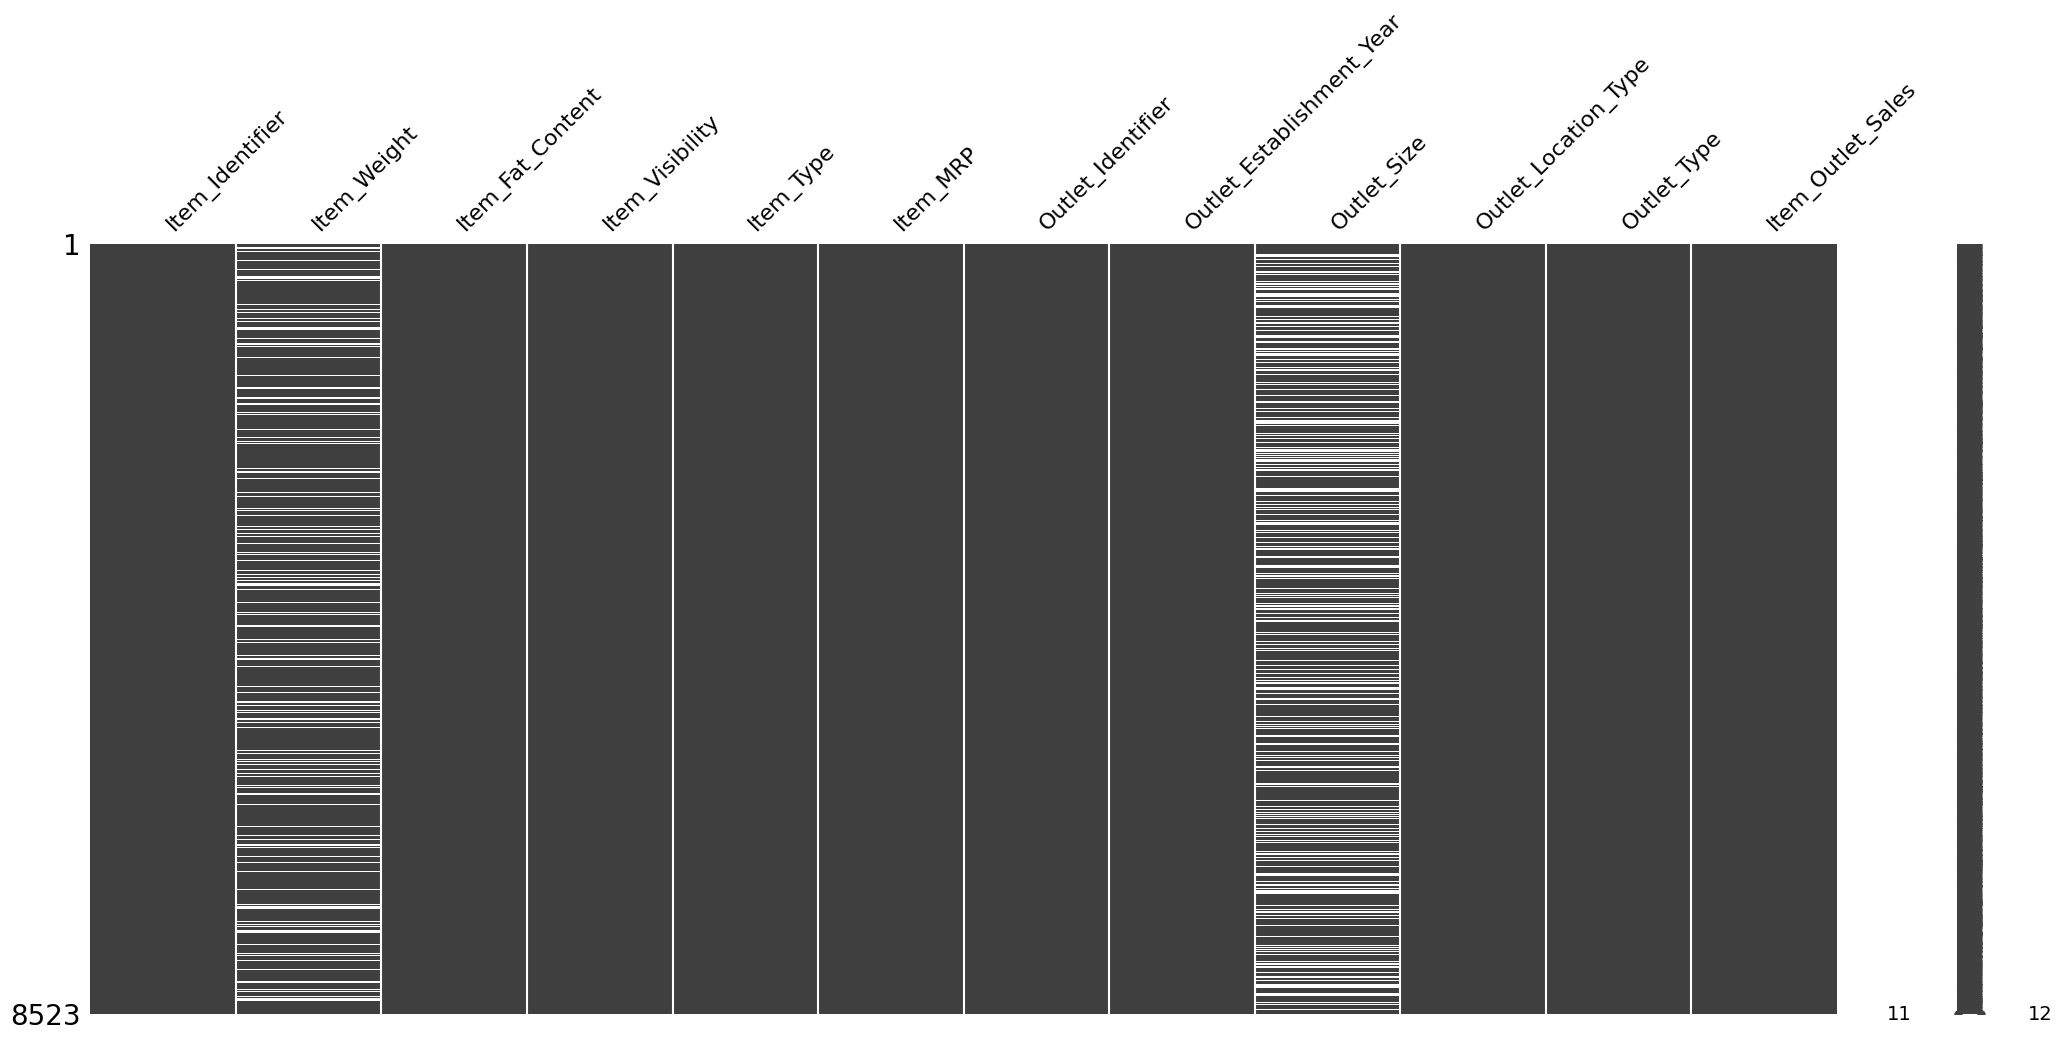

In [306]:
#through the use pf missingo
import missingno as msno
msno.matrix(df_prediction)

adressing any incosistent categories

In [307]:
# adressing any incosistent categories that are objects
obj_columns=df_prediction.select_dtypes('object').columns
obj_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [308]:
#Iterate over each object column
for col in obj_columns:
  print(f"value count for {col}")
  print(df_prediction[col].value_counts())
  print('\n')




value count for Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


value count for Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


value count for Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


value count for Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013    

In [309]:
#adressing incosistency in Item_Fat_Content
df_prediction['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [310]:
df_prediction['Item_Fat_Content'].replace({"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"})

,Item_Fat_Content
0,Low Fat
1,Regular
2,Low Fat
3,Regular
4,Low Fat
...,...
8518,Low Fat
8519,Regular
8520,Low Fat
8521,Regular


In [311]:
df_prediction['Item_Fat_Content']=df_prediction['Item_Fat_Content'].replace({"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"})

In [312]:
#verify the change
df_prediction['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006




statistical analysis for numbers


In [313]:
# analyzing categories that are number=
num_columns=df_prediction.select_dtypes('number').columns
num_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [314]:
#Iterate over each object column and obtain the summary statistic
df_prediction[num_columns].describe()





,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

In [315]:
df_prediction.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [316]:
df_prediction.dtypes


,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [317]:
#importing
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

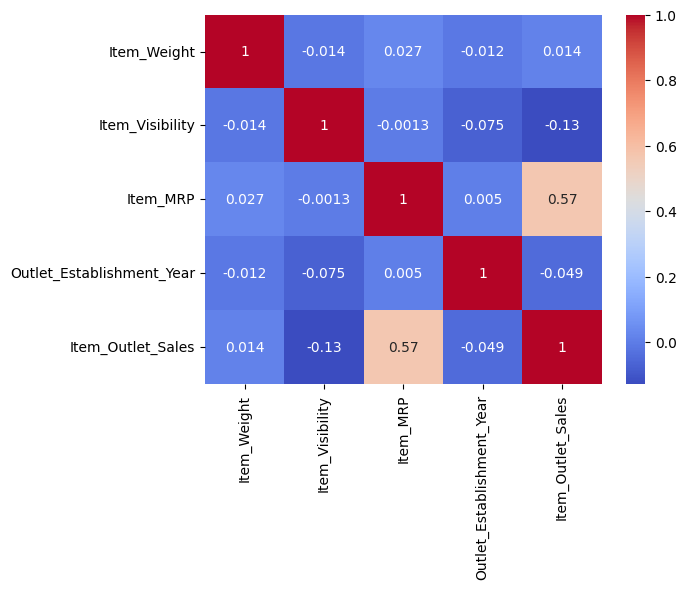

In [318]:
#understandin correlation between numeric values in the data set
fig, ax=plt.subplots()
corr=df_prediction.corr(numeric_only=True)
sns.heatmap(corr, cmap= 'coolwarm', annot=True)

there is a moderate  possitive correlation between item _mvp and item_outlet_sales at a degree of 0.57


# Histogram Visualization for Numerical values

<Axes: ylabel='Item_Outlet_Sales'>

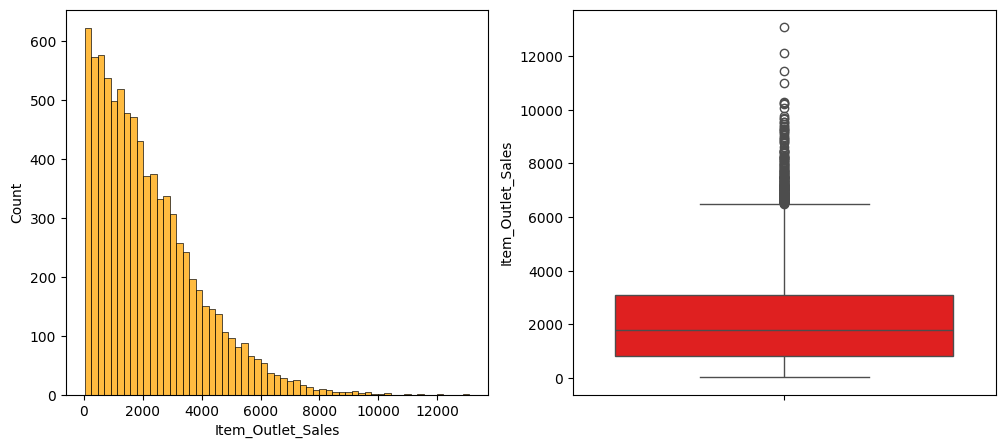

In [319]:
# Histogram/ boxplot for Item_Sales
fig,ax=plt.subplots(ncols=2,figsize=(12,5))
sns.histplot(data=df_prediction,x='Item_Outlet_Sales',color='orange',ax=ax[0]);
sns.boxplot(data=df_prediction,y='Item_Outlet_Sales',color='red',ax=ax[1])


there is high count of items that has low  Sales  in the  stores.

and there is high amount of outliers

the mean is 2181 and the mode is 1794

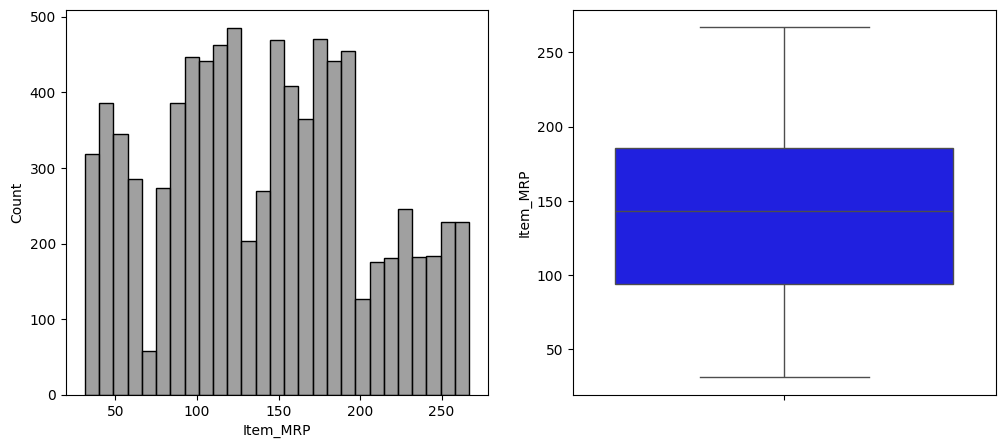

In [320]:
# Histogram / boxplot for Item_ MAXIMUM RETAIL PRICE
fig,ax=plt.subplots(ncols=2,figsize=(12,5))
sns.histplot(data=df_prediction,x='Item_MRP',color='gray', edgecolor='black',bins='auto',ax=ax[0]);
sns.boxplot(data=df_prediction,y='Item_MRP',color='blue',ax=ax[1]);





 the mode 143 is greater than the mean 140 , the distribution is  skewed left (negatively skewed) as shown in the histagram

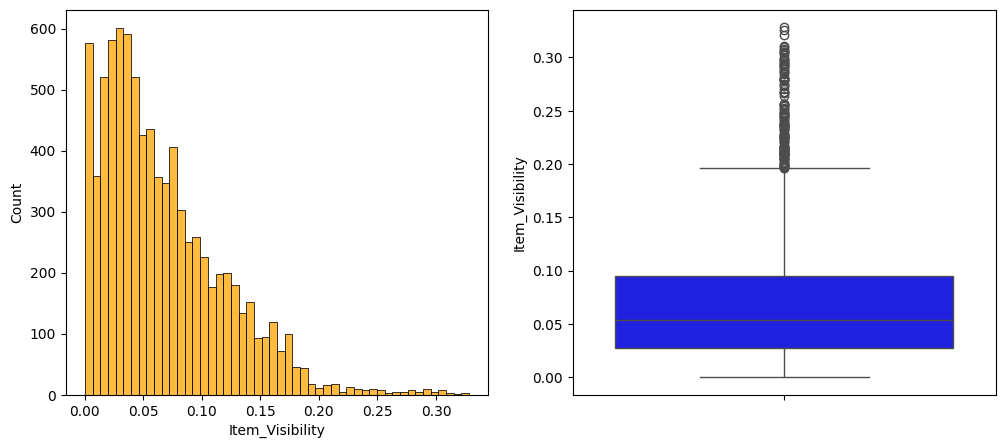

In [321]:
# Histogram / boxplot for Item_Visibility
fig,ax=plt.subplots(ncols=2,figsize=(12,5))
sns.histplot(data=df_prediction,x='Item_Visibility',color='orange', edgecolor='black',bins='auto',ax=ax[0]);
sns.boxplot(data=df_prediction,y='Item_Visibility',color='blue',ax=ax[1]);

there is high percent of items that has low visiblity

and there is high amount of outliers





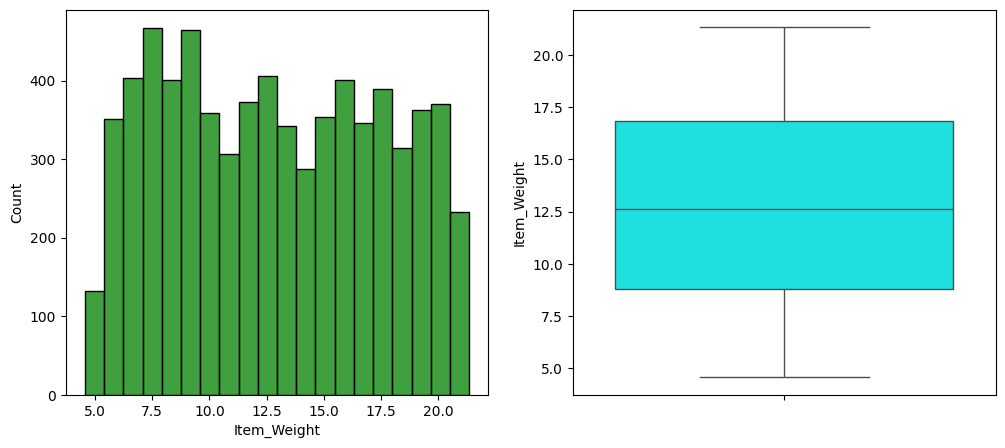

In [322]:
# Histogram / boxplot for Item_ Weight
fig,ax=plt.subplots(ncols=2,figsize=(12,5))
sns.histplot(data=df_prediction,x='Item_Weight',color='g', edgecolor='black',bins='auto',ax=ax[0]);
sns.boxplot(data=df_prediction,y='Item_Weight',color='cyan',ax=ax[1]);

item weight is normally distributed  and there is no outliars
and the mean is 12.85


#Countplots to view the frequency of each class of categorial features the dataset.


In [323]:
item_obj=df_prediction.select_dtypes(object).drop(columns=['Item_Identifier','Outlet_Identifier'])
item_obj

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,NaN,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1
...,...,...,...,...,...
8518,Low Fat,Snack Foods,High,Tier 3,Supermarket Type1
8519,Regular,Baking Goods,NaN,Tier 2,Supermarket Type1
8520,Low Fat,Health and Hygiene,Small,Tier 2,Supermarket Type1
8521,Regular,Snack Foods,Medium,Tier 3,Supermarket Type2


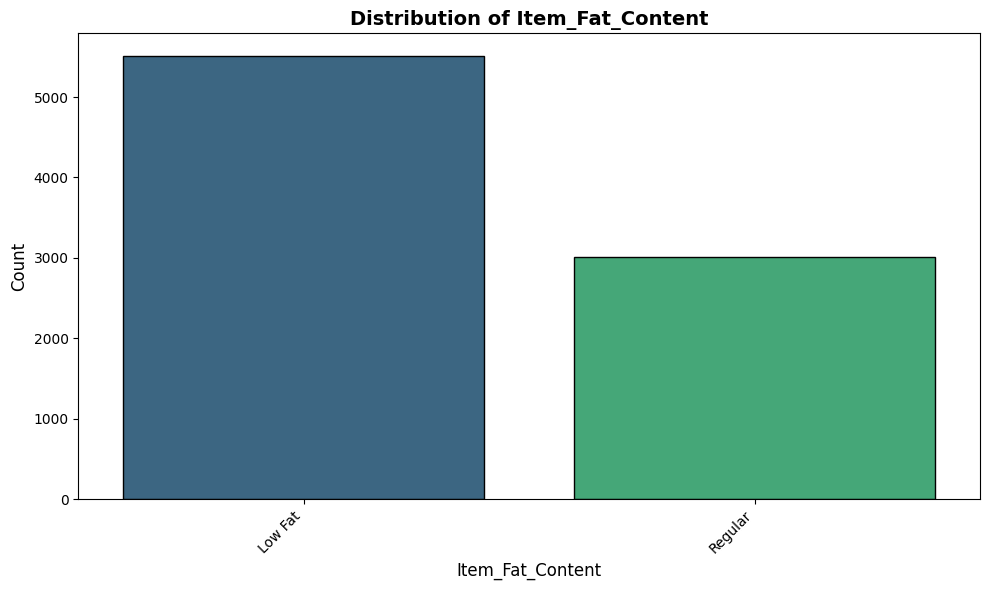

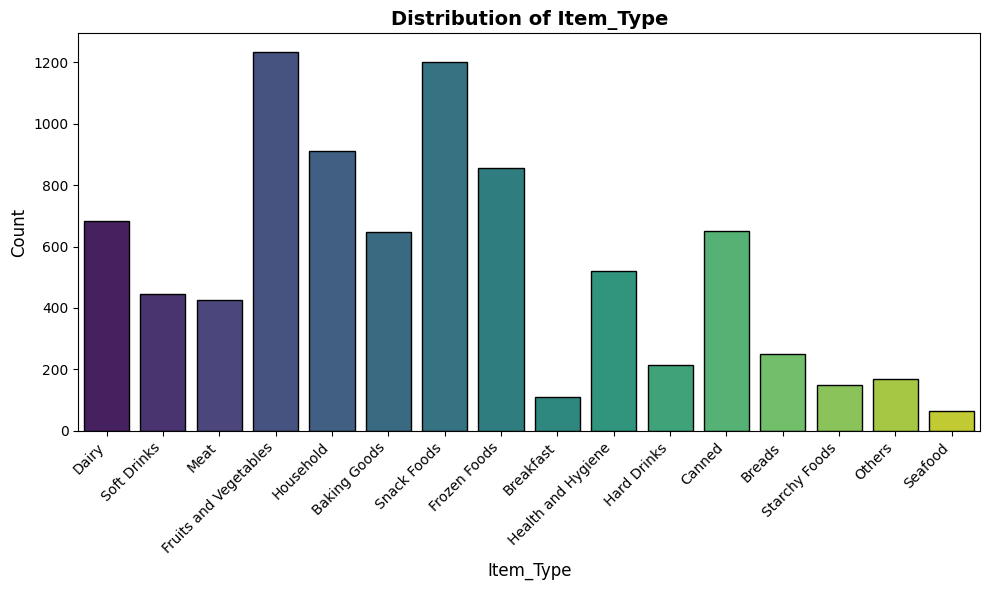

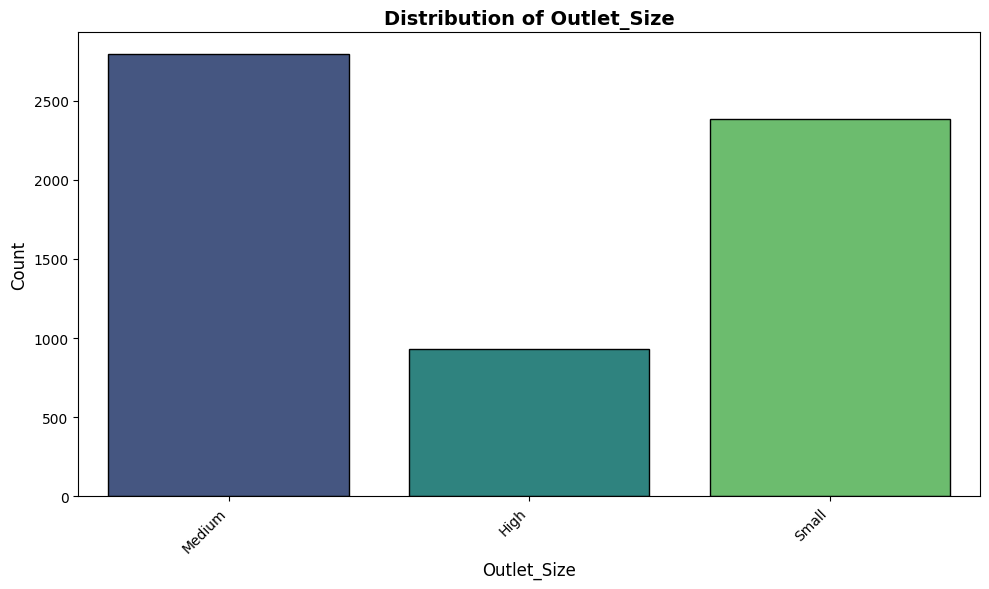

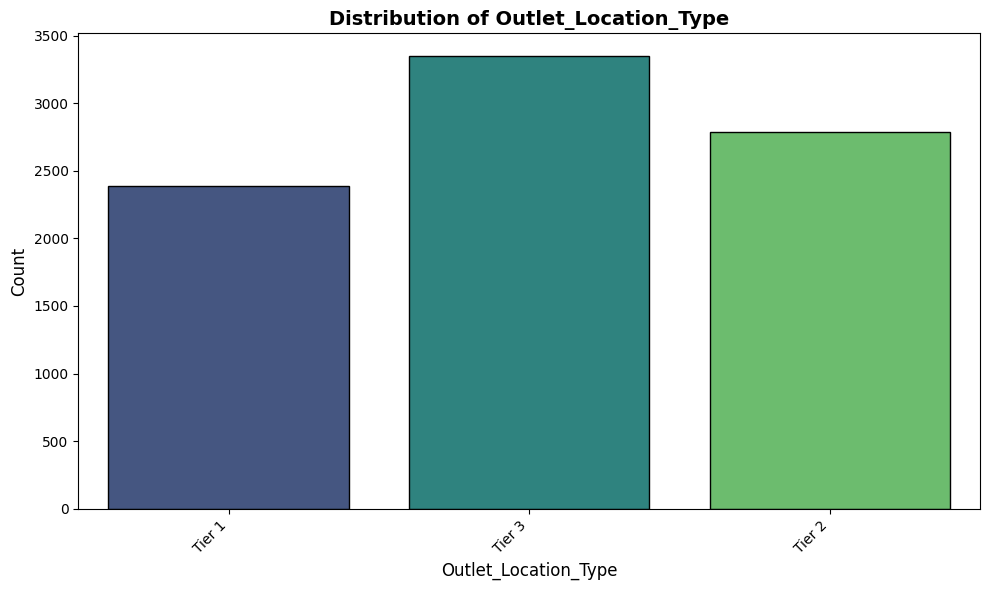

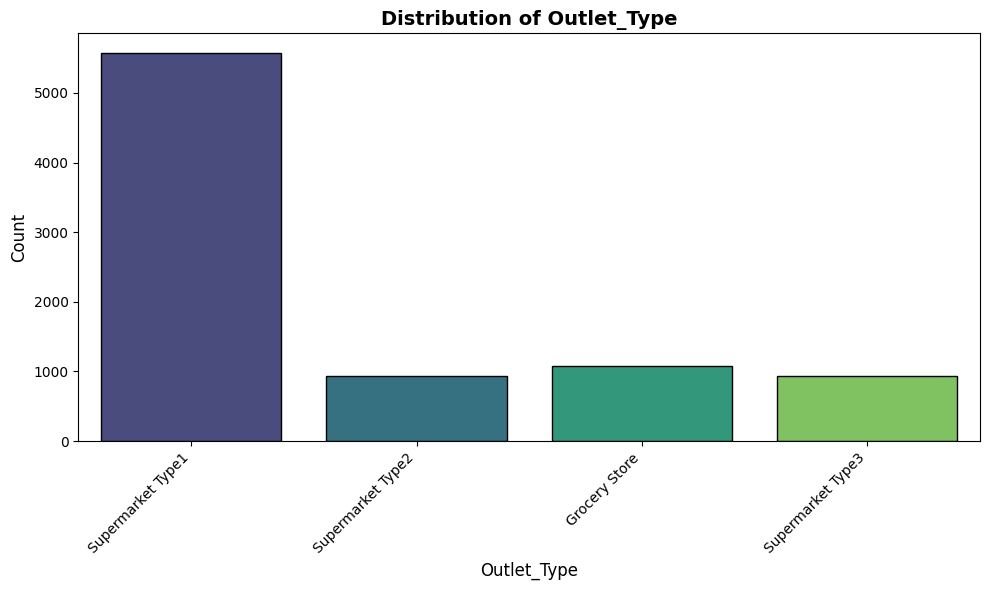

In [324]:
for column in item_obj:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_prediction, x=column, hue=column, palette='viridis',
                  edgecolor='black', legend=False)
    plt.title(f'Distribution of {column}', fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Count Plot Findings:

- Item Fat Content: there is high amount of low fat item being sold at the stores

- Item Type: Majority of items being sold are fruits and vegetables and snack foods while breakfast and seafood items has the lowest count of sale.

- Outlet Location Type: majority of the outlets are located in tier 3 followed by tier 2.

- Outlet_type: majority of the outtlet type are supermarket type 1


## Feature Inspection

In [325]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#EDA FUNCTIONS

In [326]:
#function 1
def explore_categorical(df,x,fillna=True,placeholder ='MISSING',figsize=(6,4),order=None):
  copy_df=df.copy()
  null_count=copy_df[x].isna().sum()
  null_perc= null_count/len(copy_df) *100
  if fillna ==True:
   df[x]=df[x].fillna(placeholder)
  fig,ax=plt.subplots(figsize=figsize)
  sns.countplot(data=df,x=x,hue=x, order = order)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');
  ax.set_title(f'Column : {x}');
  ax.set_title("Testing using the returned ax")
  fig.tight_layout();
  plt.show();


  #print
  #null values
  print(f"NaNs found :{null_count}({round(null_perc,2)}%)")
  #unique values in df
  nunique=copy_df[x].nunique()
  print(f" unique values : {nunique}")
  val_count=copy_df[x].value_counts(dropna=False)
  freq=val_count.values[0]
  perc_most_common =(freq/ len(copy_df) *100)
 #percentage of the most common value
  most_comm_val=val_count.index[0]
  perc_most_common =(freq/ len(copy_df) *100)
  print(f"- Most common value: '{most_comm_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # Is the feature quasi-constant or constant
  if perc_most_common>98 :
   print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
   print("- Not constant or quasi-constant.")
  return fig,ax

In [327]:
#FUNCTION 2
def plot_categorical_vs_target(df,x,y="Item_Outlet_Sales",figsize=(6,4),fillna=True,placeholder='MISSING',order=None):
  #make a copy
  copy_df=df.copy()
  #fillna with place_order
  if fillna == True:
    copy_df[x]=copy_df[x].fillna(placeholder)
  #drop
  else:
    copy_df=copy_df.dropna(subset=[x])
  #create fig
  fig,ax=plt.subplots(figsize=(6,4))
  sns.stripplot(data=copy_df,x=x,y=y,ax=ax,order=order,hue=x,legend=False,edgecolor='white',linewidth=0.5,size=3,zorder=0)
#barplot
  sns.barplot(data=copy_df,x=x,y=y,ax=ax,alpha=0.6,hue=x,order=order,linewidth=1,edgecolor='k',errorbar=None)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout();
  return fig,ax


In [328]:
#FUNCTION 3
def explore_numric(df,x,figsize=(6,5)):
  # Make a copy of the dataframe and fillna
  copy_df = df.copy()
  gridspec_kw={"height_ratios":[0.7,0.3]}
  fig,ax=plt.subplots(nrows=2,figsize=(6,6),sharex=True,gridspec_kw=gridspec_kw)
  #HISOGRAM ON TOP
  sns.histplot(data=df,x=x,ax=ax[0])
  #BOXPLOT
  sns.boxplot(data=df,x=x,ax=ax[1])
  ax[0].set_title(f"Column :{x}")
  #fit
  fig.tight_layout()
  #to make the  function  show the plt before the msg
  plt.show()
  ## Print message with info on the count and % of null values
  null_count=df[x].isna().sum()
  null_per= (null_count/len(df))*100
  print(f"- NaN's Found: {null_count}({null_per})")
   #unique values in df
  nunique=copy_df[x].nunique()
  print(f" unique values : {nunique}")
  val_count=copy_df[x].value_counts(dropna=False)
  freq=val_count.values[0]
  perc_most_common =(freq/ len(copy_df) *100)
 #percentage of the most common value
  most_comm_val=val_count.index[0]
  perc_most_common =(freq/ len(copy_df) *100)
  print(f"- Most common value: '{most_comm_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # Is the feature quasi-constant or constant
  if perc_most_common>98 :
   print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
   print("- Not constant or quasi-constant.")

In [329]:
def plot_numeric_vs_target(df,x,y='Item_Outlet_Sales',figsize=(6,4),**kwargs):
  corr=df[[x,y]].corr().round(2)
  r=corr.loc[x,y]
  #plot
  fig,ax=plt.subplots(figsize=(6,4));
  scatter_kws={'ec':'white','linewidths':1,'alpha':0.8}
  sns.regplot(data=df,x=x,y=y,scatter_kws=scatter_kws,**kwargs);
  ax.set_title(f"{x} VS {y} (r = {r})");
  fig.tight_layout();
  plt.show();
  return fig,ax

target we want to explore is Item_Outlet_Sales

feature : item_weight

-Weight of product

In [330]:
#check the datatype
feature = 'item_weight'
df_prediction['Item_Weight'].dtype

dtype('float64')

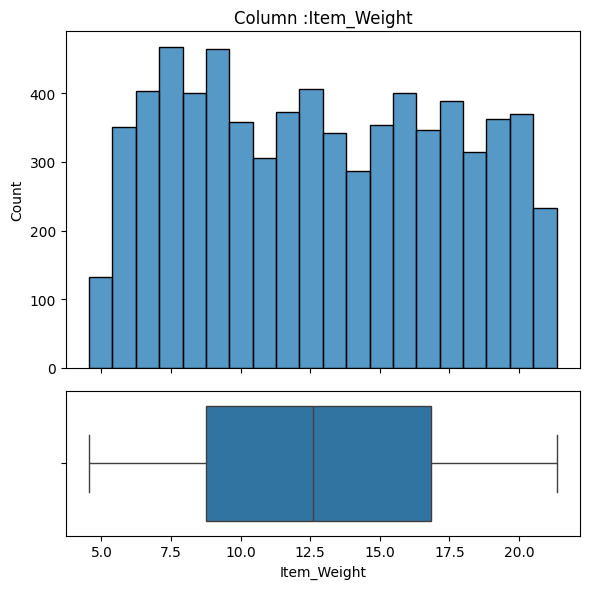

- NaN's Found: 1463(17.165317376510618)
 unique values : 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [331]:
feature = 'Item_Weight'
explore_numric(df_prediction,feature)

#Feature Observations
What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Numeric

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

- 1463 (17.17%)
- impute with a placeholder value

Is the feature constant or quasi-constant?
- Not constant or quasi-constant

What is the cardinality?
- high /more than 10 / should be dropped


Would we know this BEFORE the target is determined?

- Yes

Is there a business case/understanding reason to exclude based on our business case?

- No

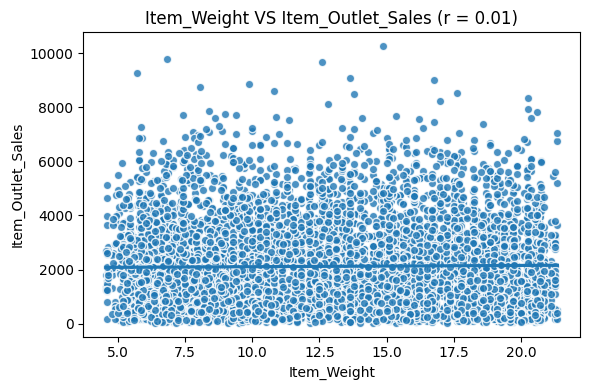

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Weight VS Item_Outlet_Sales (r = 0.01)'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>)

In [332]:
plot_numeric_vs_target(df_prediction,feature)

Feature vs. Target Observations:

 Based on your business understanding, would you expect this feature to be a predictor of the target?

 * No

Does this feature appear to be a predictor of the target?

* No. there is no correlation between Item Weight and the target / corr = 0.01.

feature : Item_Identifier

-Product ID

will not be analyzed becouse it has many uniqune values


In [333]:
df_prediction['Item_Identifier'].value_counts().sum()

np.int64(8523)

feature : Item_Fat_Content

- Whether the product is low-fat or regular


In [334]:
feature='Item_Fat_Content'
df_prediction[feature].dtype

dtype('O')

/tmp/ipython-input-718222591.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


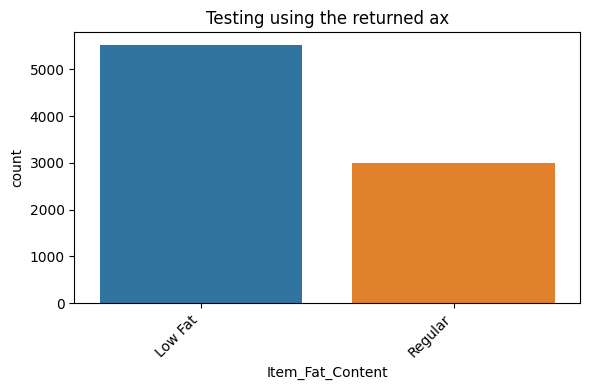

NaNs found :0(0.0%)
 unique values : 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [335]:
# run the  explore function
explore_categorical(df_prediction,feature);

#Feature Observations
What type of feature is it? (Categorical (nominal), ordinal, numeric)
- categorical

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

- 0

Is the feature constant or quasi-constant?
- Not constant or quasi-constant

What is the cardinality?
- low


Would we know this BEFORE the target is determined?

- Yes

Is there a business case/understanding reason to exclude based on our business case?

- No

/tmp/ipython-input-636299172.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


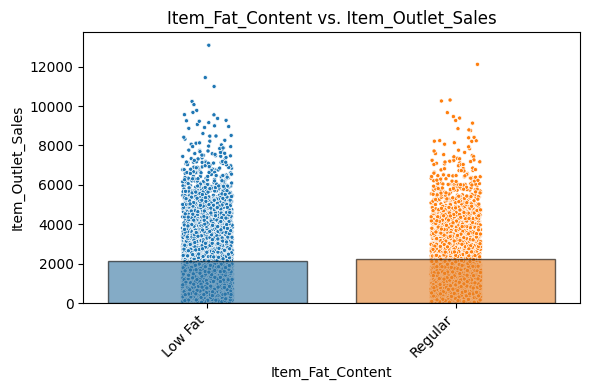

In [336]:
plot_categorical_vs_target(df_prediction,feature);

Feature vs. Target Observations:

 Based on your business understanding, would you expect this feature to be a predictor of the target?

 * No

Does this feature appear to be a predictor of the target?

* No.

feature : Item_Visibility

- The percentage of total display area of all products in a store
allocated to the particular product


In [337]:
feature='Item_Visibility'
df_prediction[feature].dtype

dtype('float64')

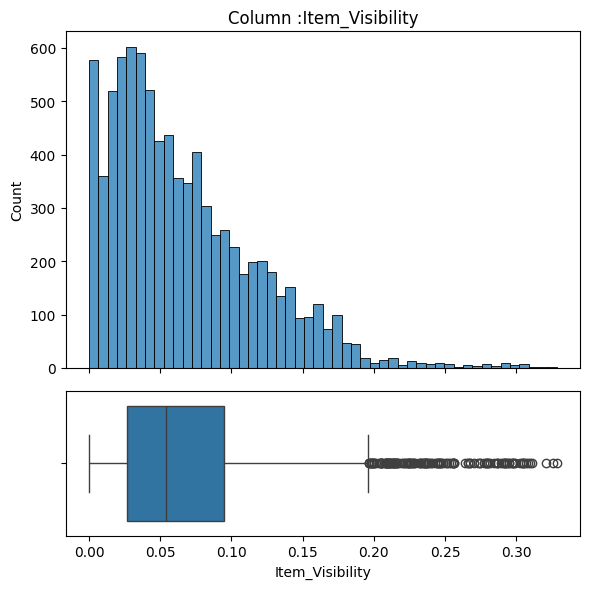

- NaN's Found: 0(0.0)
 unique values : 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [338]:
explore_numric(df_prediction,feature)

#Feature Observations
What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Numeric

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

- 0

Is the feature constant or quasi-constant?
- Not constant or quasi-constant.

What is the cardinality?
- high /more than 10


Would we know this BEFORE the target is determined?

- Yes

Is there a business case/understanding reason to exclude based on our business case?

- No

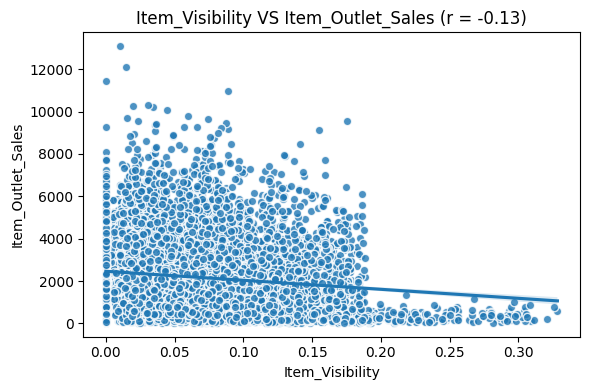

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Visibility VS Item_Outlet_Sales (r = -0.13)'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>)

In [339]:
plot_numeric_vs_target(df_prediction,feature)

Feature vs. Target Observations:

 Based on your business understanding, would you expect this feature to be a predictor of the target?

 * yes

Does this feature appear to be a predictor of the target?

* yes. there is  weak negative correlation between Item Visibility and the target.


feature : Item_Type

The category to which the product belongs

In [340]:
feature='Item_Type'
df_prediction['Item_Type'].dtype

dtype('O')

/tmp/ipython-input-718222591.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


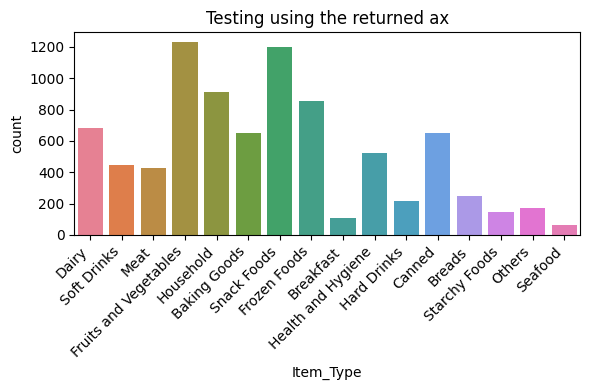

NaNs found :0(0.0%)
 unique values : 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [341]:
explore_categorical(df_prediction,feature);

#Feature Observations
What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Categorical

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

- 0

Is the feature constant or quasi-constant?
- Not constant or quasi-constant.


What is the cardinality?
- high /more than 10


Would we know this BEFORE the target is determined?

- Yes

Is there a business case/understanding reason to exclude based on our business case?

- No

/tmp/ipython-input-636299172.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


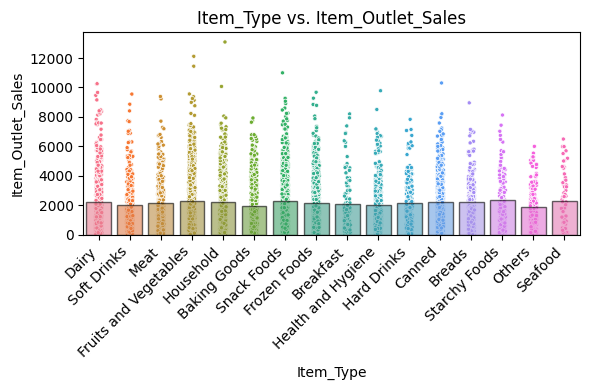

In [342]:
plot_categorical_vs_target(df_prediction,feature);

Feature vs. Target Observations:

 Based on your business understanding, would you expect this feature to be a predictor of the target?

 *  yes / different product categories typically have different sales patterns

Does this feature appear to be a predictor of the target?

* week predictor / results are very close

feature : Item_MRP  

- Maximum Retail Price (list price) of the product


In [343]:
feature='Item_MRP'
df_prediction[feature].dtype

dtype('float64')

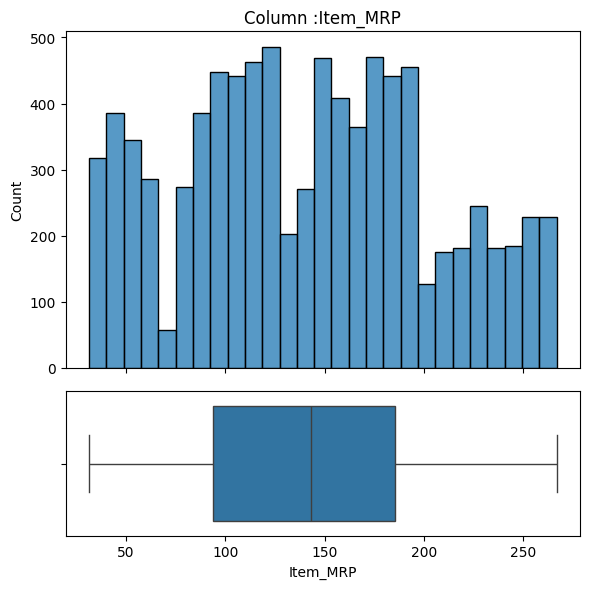

- NaN's Found: 0(0.0)
 unique values : 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [344]:
explore_numric(df_prediction,feature)

#Feature Observations
What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Numeric

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

- 0

Is the feature constant or quasi-constant?
- Not constant or quasi-constant.

What is the cardinality?
- high /more than 10


Would we know this BEFORE the target is determined?

- Yes

Is there a business case/understanding reason to exclude based on our business case?

- No

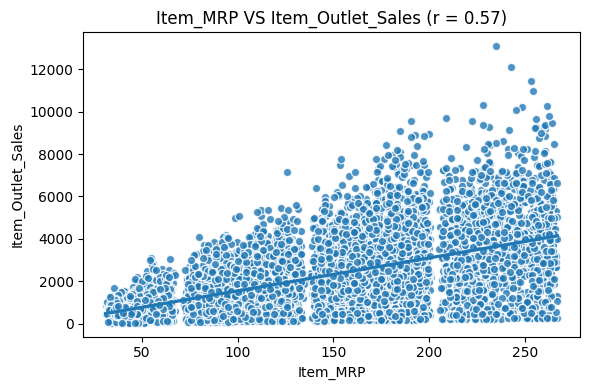

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_MRP VS Item_Outlet_Sales (r = 0.57)'}, xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>)

In [345]:
plot_numeric_vs_target(df_prediction,feature)

Feature vs. Target Observations:

 Based on your business understanding, would you expect this feature to be a predictor of the target?

 * yes/ the higher the market price the higher the doller value of sales

Does this feature appear to be a predictor of the target?

* yes

feature : Outlet_Identifier    

- Store ID


In [346]:
feature= 'Outlet_Identifier'
df_prediction[feature].dtype

dtype('O')

/tmp/ipython-input-718222591.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


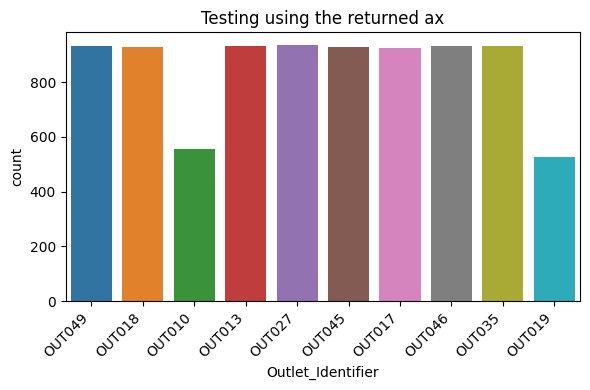

NaNs found :0(0.0%)
 unique values : 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [347]:
explore_categorical(df_prediction,feature);

#Feature Observations
What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Categorical

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

- 0

Is the feature constant or quasi-constant?
- Not constant or quasi-constant

What is the cardinality?
- high


Would we know this BEFORE the target is determined?

- Yes

Is there a business case/understanding reason to exclude based on our business case?

- No

/tmp/ipython-input-636299172.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


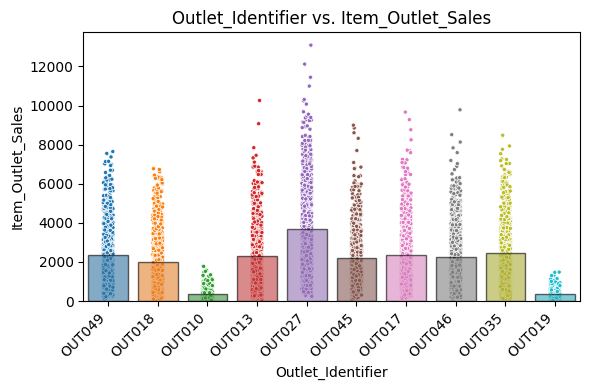

In [348]:
plot_categorical_vs_target(df_prediction,feature);

Feature vs. Target Observations:

 Based on your business understanding, would you expect this feature to be a predictor of the target?

 * yes / some stores have higher sales

Does this feature appear to be a predictor of the target?

* yes

feature : Outlet_Establishment_Year    

- The year in which store was established


In [349]:
feature= 'Outlet_Establishment_Year'
df_prediction[feature].dtype

dtype('int64')

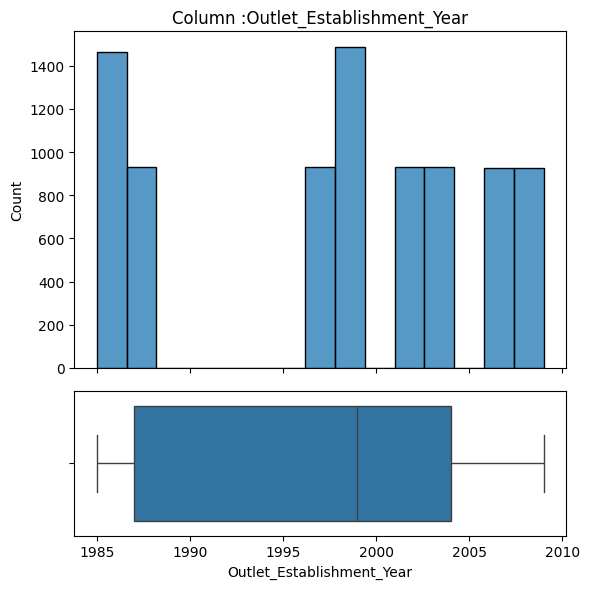

- NaN's Found: 0(0.0)
 unique values : 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [350]:
explore_numric(df_prediction,feature);

#Feature Observations
What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Categorical

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

- 0

Is the feature constant or quasi-constant?
- Not constant or quasi-constant.

What is the cardinality?
- low /less than 10


Would we know this BEFORE the target is determined?

- Yes

Is there a business case/understanding reason to exclude based on our business case?

- No

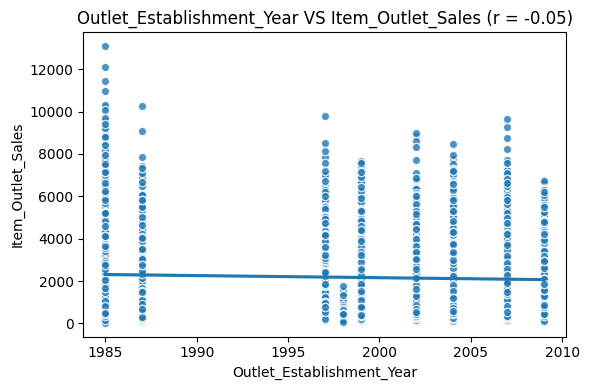

In [351]:
plot_numeric_vs_target(df_prediction,feature);

Feature vs. Target Observations:

 Based on your business understanding, would you expect this feature to be a predictor of the target?

 * No

Does this feature appear to be a predictor of the target?

* No. there is no correlation between Outlet_Establishment_Year and the target

feature : Outlet_Size  

- The size of the store in terms of ground area covered


In [352]:
feature= 'Outlet_Size'
df_prediction[feature].dtype

dtype('O')

/tmp/ipython-input-718222591.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


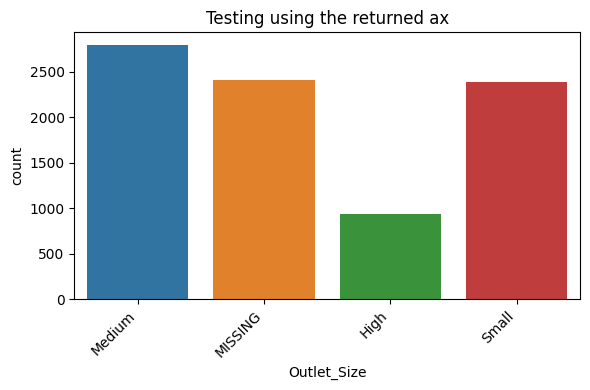

NaNs found :2410(28.28%)
 unique values : 3
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [353]:
explore_categorical(df_prediction,feature);

#Feature Observations
What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Categorical

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

- 2410 (28.28%)
- impute with a placeholder value

Is the feature constant or quasi-constant?
- Not constant or quasi-constant.

What is the cardinality?
- low


Would we know this BEFORE the target is determined?

- Yes

Is there a business case/understanding reason to exclude based on our business case?

- No

/tmp/ipython-input-636299172.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


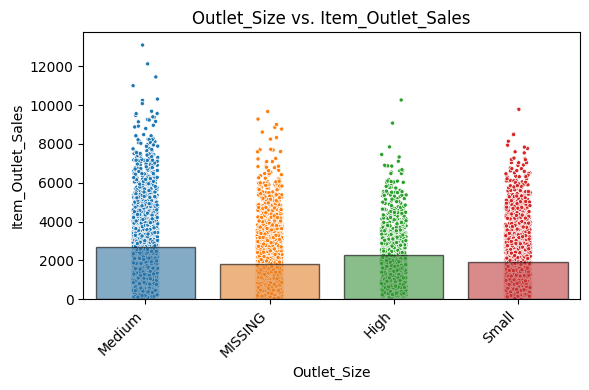

In [354]:
plot_categorical_vs_target(df_prediction,feature);

Feature vs. Target Observations:

 Based on your business understanding, would you expect this feature to be a predictor of the target?

 * yes

Does this feature appear to be a predictor of the target?

* yes / medium size had the higher item_outlet_sales  

feature : Outlet_Location_Type

- The type of area in which the store is located


In [355]:
feature= 'Outlet_Location_Type'
df_prediction[feature].dtype

dtype('O')

/tmp/ipython-input-718222591.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


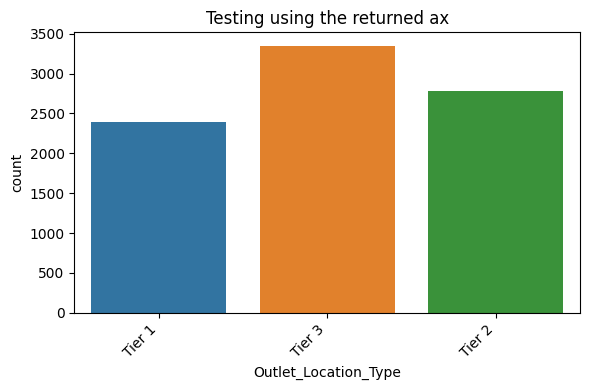

NaNs found :0(0.0%)
 unique values : 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [356]:
explore_categorical(df_prediction,feature);

#Feature Observations
What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Categorical

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

- 0

Is the feature constant or quasi-constant?
- Not constant or quasi-constant

What is the cardinality?
- low / less than 10


Would we know this BEFORE the target is determined?

- Yes

Is there a business case/understanding reason to exclude based on our business case?

- No

/tmp/ipython-input-636299172.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


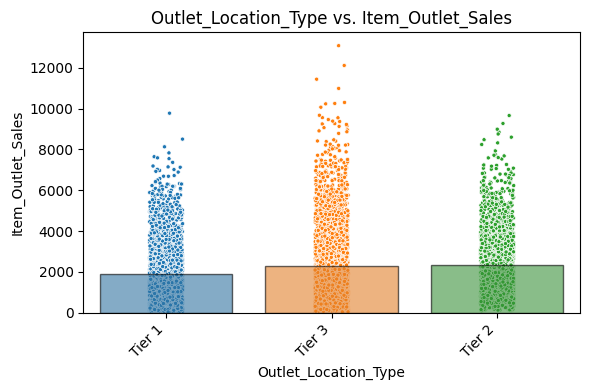

In [357]:
plot_categorical_vs_target(df_prediction,feature);

Feature vs. Target Observations:

 Based on your business understanding, would you expect this feature to be a predictor of the target?

 * yes / different locations has differnt sales

Does this feature appear to be a predictor of the target?

* yes / tier 3 and 2 had the highest sale

feature : Outlet_Type

- Whether the outlet is a grocery store or some sort of supermarket


In [358]:
feature= 'Outlet_Type'
df_prediction[feature].dtype

dtype('O')

/tmp/ipython-input-718222591.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


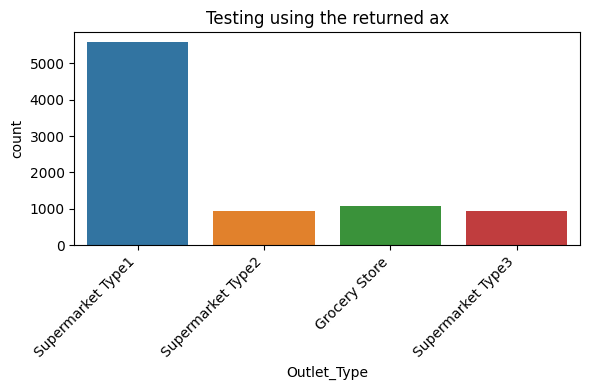

NaNs found :0(0.0%)
 unique values : 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [359]:
explore_categorical(df_prediction,feature);

#Feature Observations
What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Categorical

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)

- 0

Is the feature constant or quasi-constant?
- Not constant or quasi-constant

What is the cardinality?
- low / less than 10


Would we know this BEFORE the target is determined?

- Yes

Is there a business case/understanding reason to exclude based on our business case?

- No

/tmp/ipython-input-636299172.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


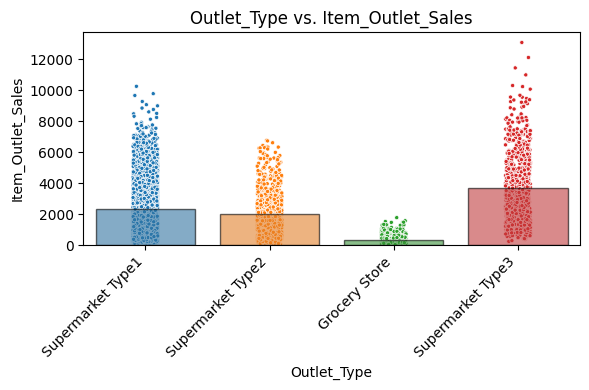

In [360]:
plot_categorical_vs_target(df_prediction,feature);

Feature vs. Target Observations:

 Based on your business understanding, would you expect this feature to be a predictor of the target?

 * yes / different types has differnt sales

Does this feature appear to be a predictor of the target?

* yes / supermarket type 3 had the higest outlet sale mean